<a href="https://colab.research.google.com/github/mtshaliqiniso50-svg/Healthcare-Analysis/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Libraries for Preprocessing and Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Model 2

# Libraries for Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path = "//content/drive/MyDrive/dataset"
Que=pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
Que

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
Que.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
Que.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
Que['TotalCharges'] = pd.to_numeric(Que['TotalCharges'], errors='coerce')
Que['TotalCharges'] = Que['TotalCharges'].fillna(0)

In [7]:
Que.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
Que.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
Que['Churn'] = Que['Churn'].map({'Yes': 1, 'No': 0})
Que

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [10]:
Que.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
Que.dropna(subset=['Churn'], inplace=True)
Que['Churn'] = Que['Churn'].map({'Yes': 1, 'No': 0})

In [12]:
Que.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,0.0
mean,0.162147,32.371149,64.761692,2279.734304,NaN
std,0.368612,24.559481,30.090047,2266.794470,NaN
min,0.000000,0.000000,18.250000,0.000000,NaN
25%,0.000000,9.000000,35.500000,398.550000,NaN
50%,0.000000,29.000000,70.350000,1394.550000,NaN
75%,0.000000,55.000000,89.850000,3786.600000,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN


In [13]:
Que['SeniorCitizen'] = Que['SeniorCitizen'].astype(int)
Que['tenure'] = Que['tenure'].astype(int)
Que['MonthlyCharges'] = Que['MonthlyCharges'].astype(float)

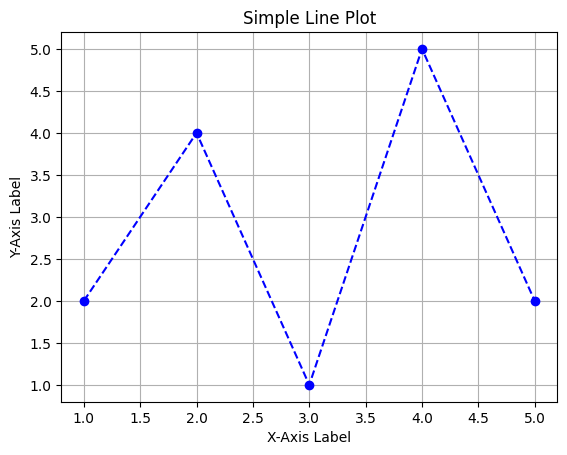

In [14]:
# Data
x_values = [1, 2, 3, 4, 5]
y_values = [2, 4, 1, 5, 2]

# Create the plot
plt.plot(x_values, y_values, marker='o', linestyle='--', color='blue')

# Add labels and title
plt.title('Simple Line Plot')
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.grid(True)
plt.show()
#

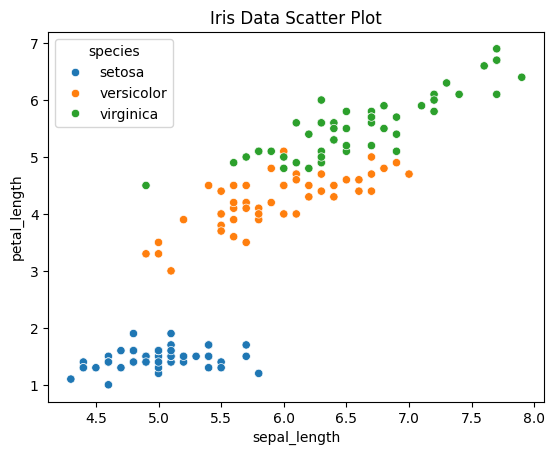

In [15]:
Que = sns.load_dataset("iris")

# Create the scatter plot
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=Que)

# Add title
plt.title('Iris Data Scatter Plot')
plt.show()

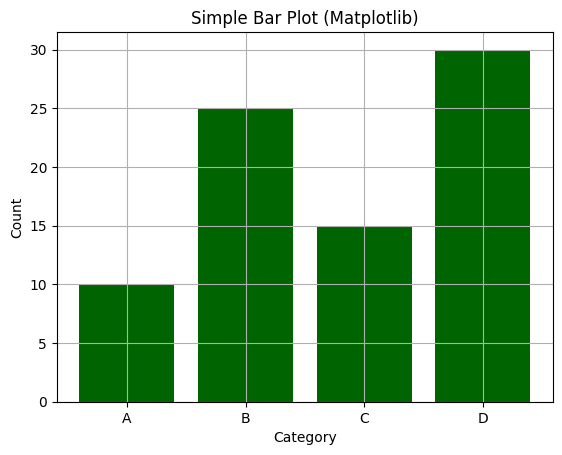

In [16]:
# Data
categories = ["A", "B", "C", "D"]
values = [10, 25, 15, 30]

# Create the bar plot
plt.bar(categories, values, color="darkgreen")

# Add labels and title
plt.title("Simple Bar Plot (Matplotlib)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(True)
plt.show()

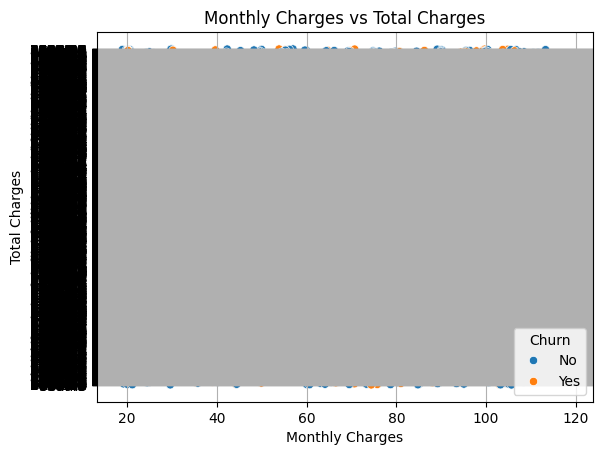

In [17]:
# Load the original dataset
Que=pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=Que)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()

In [18]:
# Sisebenzisa isiqu (prefix) esifanayo sokukhipha ikhodi, sithi "Que"
# Que = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Ukulungisa i-TotalCharges
Que['TotalCharges'] = pd.to_numeric(Que['TotalCharges'], errors='coerce')
Que['TotalCharges'] = Que['TotalCharges'].fillna(0)

# 2. Ukuguqula i-Target Variable ibe i-numeric
Que['Churn'] = Que['Churn'].map({'Yes': 1, 'No': 0})

# 3. Ukulahla i-ID bese senza i-One-Hot Encoding
Que.drop('customerID', axis=1, inplace=True)
Que_encoded = pd.get_dummies(Que, drop_first=True)

In [19]:
# X - Features, y - Target
X = Que_encoded.drop('Churn', axis=1)
y = Que_encoded['Churn']

# Ukuhlukanisa idatha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ukulinganisa (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Sibeka i-Target Variable (y) nama-Features (X)
X = Que_encoded.drop('Churn', axis=1)
y = Que_encoded['Churn']

# Ukuhlukanisa (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ukulinganisa (Scaling) ama-features e-numeric: Lokhu kuqinisekisa ukuthi yonke idatha iyasebenza kahle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Siyakha i-model
Que_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Ukuqeqesha
Que_model.fit(X_train_scaled, y_train)

# Ukwenza i-prediction kwi-Testing Set
y_pred = Que_model.predict(X_test_scaled)


In [22]:
F3Nmodel = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
F3Nmodel.fit(X_train_scaled, y_train)

# Ukwenza i-prediction
lr_y_pred = F3Nmodel.predict(X_test_scaled)

In [23]:
# 1. Ukubala i-Accuracy ye-Random Forest
Que_model_accuracy = accuracy_score(y_test, y_pred)

# 2. Ukubala i-Accuracy ye-Logistic Regression
F3Nmodel_accuracy = accuracy_score(y_test, lr_y_pred)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Qeqesha bese ugcina i-Model (LR)
Que_model = LogisticRegression(class_weight='balanced', random_state=42)
Que_model.fit(X_train_scaled, y_train)
with open('Que_model.pkl', 'wb') as file:
    pickle.dump(Que_model, file)